In [10]:
#John's
import numpy as np
import tensorflow as tf
import os
import time
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from datetime import datetime
import statistics as stat
import ROOT
now = datetime.utcnow().strftime("%y%m%d%H%M%S")

In [11]:
#Mine
import uproot
import pandas as pd
# import numpy as np
import boost_histogram as bh
# import matplotlib.pyplot as plt
import pickle
import gc
import atlasplots as ap
%matplotlib inline

In [12]:
nameofmodel = 'fclass_full_v01conv_1mil_even'

In [13]:
with open('TRAININGTEST/models/'+nameofmodel+'.json') as file:
    f_even = tf.keras.models.model_from_json(file.read())

In [14]:
f_even.load_weights('TRAININGTEST/models/'+nameofmodel+'.h5')

In [15]:
df_eca = pickle.load(open('TRAININGTEST/data/full_v01_ec2mil_a.pickle', 'rb'))
df_ecz = pickle.load(open('TRAININGTEST/data/full_v01_ec2mil_z.pickle', 'rb'))
# df_eua = pickle.load(open('TRAININGTEST/data/full_v01_eu2mil_a.pickle', 'rb'))
# df_euz = pickle.load(open('TRAININGTEST/data/full_v01_eu2mil_z.pickle', 'rb'))
df_oca = pickle.load(open('TRAININGTEST/data/full_v01_oc2mil_a.pickle', 'rb'))
df_ocz = pickle.load(open('TRAININGTEST/data/full_v01_oc2mil_z.pickle', 'rb'))

In [16]:
df_evenc = pd.concat([df_eca,df_ecz])
df_oddc = pd.concat([df_oca,df_ocz])
del df_eca
del df_ecz
del df_oca
del df_ocz
gc.collect()

1333

In [17]:
features_stand = ['HadLeakage_stand', 'y_Reta_stand', 'y_Rphi_stand', 'y_weta2_stand',
                   'y_wtots1_stand', 'y_weta1_stand', 'y_fracs1_stand', 'y_deltae_stand',
                   'y_Eratio_stand', 'y_f1_stand']
features = ['HadLeakage', 'y_Reta', 'y_weta2', 'y_Rphi', 'y_wtots1', 
            'y_weta1', 'y_fracs1', 'y_deltae', 'y_Eratio', 'y_f1']

In [18]:
# FOR NOW just doing **unconv.**  variables
featlist = features_stand   # either features or features_stand 
weightstr = 'finalWeight'   #either 'finalWeight' for E_T and eta weighting or 'goodWeight' for not


# for unconverted. (##add in option to change later)
features_even = np.array(df_evenc[featlist])
labels_even   = np.array(df_evenc['y_isTruthMatchedPhoton'])
weights_even  = np.array(df_evenc[weightstr])
features_odd = np.array(df_oddc[featlist])
labels_odd   = np.array(df_oddc['y_isTruthMatchedPhoton'])
weights_odd  = np.array(df_oddc[weightstr])

# train_features_odd = np.array(df_oddc[featlist])
# train_labels_odd   = np.array(df_oddc['y_isTruthMatchedPhoton'])
# train_weights_odd  = np.array(df_oddc[weightstr])
# test_features_odd = np.array(df_evenc[featlist])
# test_labels_odd   = np.array(df_evenc['y_isTruthMatchedPhoton'])
# test_weights_odd  = np.array(df_evenc[weightstr])

In [19]:
y_pred = f_even.predict(features_odd).ravel()
y_pred

array([0.9702457 , 0.9268693 , 0.01598772, ..., 0.95318997, 0.9148109 ,
       0.9611758 ], dtype=float32)

Text(0.5, 1.0, 'Odd Converted, First & Last 2mil Events')

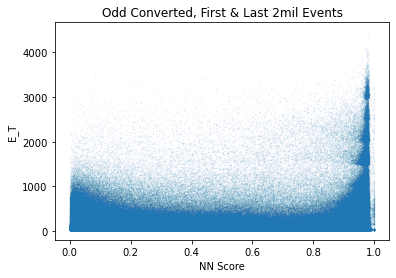

In [20]:
plt.scatter(y_pred,df_oddc.y_pt.ravel(),alpha=0.1,s=0.1)
plt.xlabel('NN Score');plt.ylabel('E_T')
plt.title('Odd Converted, First & Last 2mil Events')

Text(0.5, 1.0, 'Odd Converted, First & Last 2mil Events')

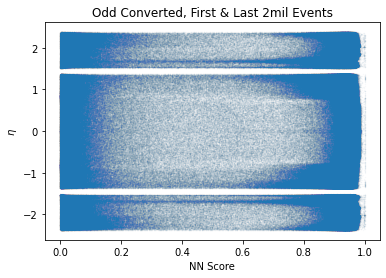

In [21]:
plt.scatter(y_pred,df_oddc.y_eta.ravel(),alpha=0.05,s=0.1)
plt.xlabel('NN Score');plt.ylabel(r'$\eta$')
plt.title('Odd Converted, First & Last 2mil Events')

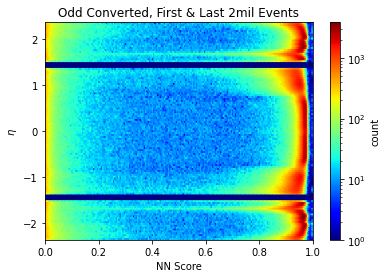

In [43]:
###try heatmaps (i.e. 2d histograms)


# from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
# import numpy as NP

import matplotlib.colors as colors

# n = 1e5
# x = y = NP.linspace(-5, 5, 100)
# X, Y = NP.meshgrid(x, y)
# Z1 = ML.bivariate_normal(X, Y, 2, 2, 0, 0)
# Z2 = ML.bivariate_normal(X, Y, 4, 1, 1, 1)
# ZD = Z2 - Z1
# x = X.ravel()
# y = Y.ravel()
# z = ZD.ravel()
gridsize=200
plt.subplot(111)

# # if 'bins=None', then color of each hexagon corresponds directly to its count
# # 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# # the result is a pure 2D histogram 
x = y_pred
y = df_oddc.y_eta.ravel()

plt.hexbin(x, y, gridsize=gridsize, cmap=CM.jet, bins=None, norm=colors.LogNorm())
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('count')  #make this log(count)

plt.xlabel('NN Score')
plt.ylabel(r'$\eta$')
plt.title('Odd Converted, First & Last 2mil Events')

plt.show() 

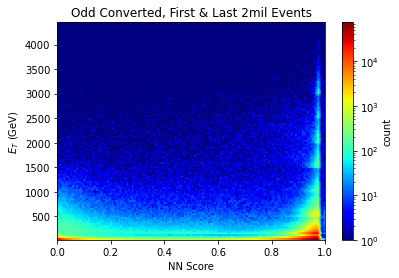

In [44]:
gridsize=200
plt.subplot(111)

# # if 'bins=None', then color of each hexagon corresponds directly to its count
# # 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# # the result is a pure 2D histogram 
x = y_pred
y2 = df_oddc.y_pt.ravel()

plt.hexbin(x, y2, gridsize=gridsize, cmap=CM.jet, bins=None, norm=colors.LogNorm())
plt.axis([x.min(), x.max(), y2.min(), y2.max()])

cb = plt.colorbar()
cb.set_label('count')

plt.xlabel('NN Score')
plt.ylabel(r'$E_T$ (GeV)')
plt.title('Odd Converted, First & Last 2mil Events')

plt.show() 

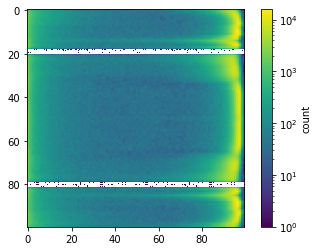

In [39]:
#or


# import numpy as np
# import numpy.random
# import matplotlib.pyplot as plt

# # Generate some test data
# x = np.random.randn(8873)
# y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', norm=colors.LogNorm())

cb = plt.colorbar()
cb.set_label('count')  #make this log(count)

plt.show()

